In [2]:
import pennylane as qml
from pennylane import numpy as np
from qiskit import QuantumCircuit
import sys
import os
sys.path.append('..')
from q_alchemy.qiskit_integration import QAlchemyInitialize
from q_alchemy.qiskit_to_pennylane import QAlchemyStatePreparation

os.environ["Q_ALCHEMY_API_KEY"] = "<Your API KEY here>"


# Introduction

Here, we illustrate how the qiskit quantum circuit generated by Q-alchemy can be converted into pennylane circuits using qiskit_to_pennylane module. 
We will first demonstrate the transformation process with a simple 2 qubit circuit.

In [2]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    qml.MottonenStatePreparation(state_vector=state, wires=range(3))
    return qml.state()

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=150)(state))

0: ──RY(2.35)─╭●───────────╭●──────────────╭●────────────────────────╭●─╭●────────╭●────╭●────╭●─╭GlobalPhase(-0.79)─┤ ╭State
1: ──RY(2.09)─╰X──RY(0.21)─╰X─╭●───────────│────────────╭●───────────│──╰X────────╰X─╭●─│──╭●─│──├GlobalPhase(-0.79)─┤ ├State
2: ──RY(1.88)─────────────────╰X──RY(0.10)─╰X──RY(0.08)─╰X──RY(0.15)─╰X──RZ(1.57)────╰X─╰X─╰X─╰X─╰GlobalPhase(-0.79)─┤ ╰State


In [3]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    QAlchemyStatePreparation(state_vector=state, wires=range(3))
    return qml.state()

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=120)(state))
# circuit(state)

 0: ────────────────────────────────────────────────────╭X──RZ(-1.57)──RX(1.57)──RZ(4.71)──RX(1.57)──RZ(7.08)───
 1: ──RZ(-0.40)──RX(1.57)──RZ(4.71)──RX(1.57)──RZ(9.42)─│─────────────────────────────────────────────────────╭X
 2: ──RY(0.09)──────────────────────────────────────────╰●──RZ(-3.14)──RX(1.57)──RZ(5.41)──RX(1.57)──RZ(7.85)─╰●
-1: ──RZ(0.00)───RX(1.57)──RZ(4.77)──RX(1.57)──RZ(7.85)─────────────────────────────────────────────────────────

──────────────────────────────────────────────────────────────────────────────────────────────────────────╭●──RZ(1.57)
───RZ(2.98)──RX(1.57)──RZ(4.34)──RX(1.57)──RZ(8.29)─╭X──RZ(1.57)───RX(1.57)──RZ(3.55)──RX(1.57)──RZ(6.28)─│───────────
───RZ(1.57)──RX(1.57)──RZ(5.41)──RX(1.57)──RZ(6.28)─╰●──RZ(-1.88)──RX(1.57)──RZ(3.14)──RX(1.57)──RZ(6.59)─│───────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────╰X──RZ(2.93)

───RX(1.57)──RZ(5.18)──RX(1.57)──RZ(6.28)─╭●──RZ(-1.57)──RX(1.57)──RZ(

In [4]:
import numpy as np

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

from qiskit import transpile

def preparation_circuit(X):
    init = QAlchemyInitialize(X, opt_params={'max_fidelity_loss':0.0, 'basis_gates': ["id", "rx", "ry", "rz", "cx"]})
    return init.definition

qc = preparation_circuit(state)

qc.draw()


┌──────────────┐                          ┌────────┐ ┌─────────┐ »
q_0: ┤ Ry(0.087802) ├─────────────────■────────┤ Rz(-π) ├─┤ Rx(π/2) ├─»
     ├──────────────┤┌─────────┐      │       ┌┴────────┴┐├─────────┤ »
q_1: ┤ Rz(-0.40375) ├┤ Rx(π/2) ├──────┼───────┤ Rz(3π/2) ├┤ Rx(π/2) ├─»
     └──────────────┘└─────────┘    ┌─┴─┐     ├──────────┤├─────────┤ »
q_2: ───────────────────────────────┤ X ├─────┤ Rz(-π/2) ├┤ Rx(π/2) ├─»
        ┌───────┐    ┌─────────┐┌───┴───┴────┐├─────────┬┘├─────────┴┐»
q_3: ───┤ Rz(0) ├────┤ Rx(π/2) ├┤ Rz(4.7694) ├┤ Rx(π/2) ├─┤ Rz(5π/2) ├»
        └───────┘    └─────────┘└────────────┘└─────────┘ └──────────┘»
«     ┌────────────┐┌─────────┐ ┌──────────┐       ┌─────────┐  ┌─────────┐»
«q_0: ┤ Rz(5.4087) ├┤ Rx(π/2) ├─┤ Rz(5π/2) ├───■───┤ Rz(π/2) ├──┤ Rx(π/2) ├»
«     └─┬────────┬─┘└─────────┘ └──────────┘ ┌─┴─┐┌┴─────────┴─┐├─────────┤»
«q_1: ──┤ Rz(3π) ├───────────────────────────┤ X ├┤ Rz(2.9753) ├┤ Rx(π/2) ├»
«      ┌┴────────┴┐ ┌─────────┐┌────────────┐└───┘└┬─────────┬─┘├─────────┤»
«q_2: ─┤ Rz(3π/2) ├─┤ Rx(π/2) ├┤ Rz(7.0777) ├──■───┤ Rz(π/2) ├──┤ Rx(π/2) ├»
«      └──────────┘ └─────────┘└────────────┘┌─┴─┐┌┴─────────┴─┐├─────────┤»
«q_3: ───────────────────────────────────────┤ X ├┤ Rz(2.9276) ├┤ Rx(π/2) ├»
«                                            └───┘└────────────┘└─────────┘»
«     ┌────────────┐┌─────────┐  ┌────────┐       ┌─────────────┐┌─────────┐»
«q_0: ┤ Rz(5.4087) ├┤ Rx(π/2) ├──┤ Rz(2π) ├────■──┤ Rz(-1.8787) ├┤ Rx(π/2) ├»
«     ├────────────┤├─────────┤┌─┴────────┴─┐┌─┴─┐└─┬─────────┬─┘├─────────┤»
«q_1: ┤ Rz(4.3427) ├┤ Rx(π/2) ├┤ Rz(8.2889) ├┤ X ├──┤ Rz(π/2) ├──┤ Rx(π/2) ├»
«     ├───────────┬┘├─────────┤└─┬────────┬─┘└───┘  ├─────────┴┐ ├─────────┤»
«q_2: ┤ Rz(5.176) ├─┤ Rx(π/2) ├──┤ Rz(2π) ├────■────┤ Rz(-π/2) ├─┤ Rx(π/2) ├»
«     ├───────────┴┐├─────────┤┌─┴────────┴─┐┌─┴─┐  ├─────────┬┘ ├─────────┤»
«q_3: ┤ Rz(4.3634) ├┤ Rx(π/2) ├┤ Rz(8.2846) ├┤ X ├──┤ Rz(π/2) ├──┤ Rx(π/2) ├»
«     └────────────┘└─────────┘└────────────┘└───┘  └─────────┘  └─────────┘»
«       ┌───────┐   ┌─────────┐┌────────────┐
«q_0: ──┤ Rz(π) ├───┤ Rx(π/2) ├┤ Rz(6.5911) ├
«     ┌─┴───────┴──┐├─────────┤└─┬────────┬─┘
«q_1: ┤ Rz(3.5453) ├┤ Rx(π/2) ├──┤ Rz(2π) ├──
«     └┬──────────┬┘├─────────┤ ┌┴────────┴┐ 
«q_2: ─┤ Rz(3π/2) ├─┤ Rx(π/2) ├─┤ Rz(5π/2) ├─
«     ┌┴──────────┴┐├─────────┤ └┬────────┬┘ 
«q_3: ┤ Rz(3.6527) ├┤ Rx(π/2) ├──┤ Rz(3π) ├──
«     └────────────┘└─────────┘  └────────┘

In [5]:
qc = QuantumCircuit(2,2)
qc.rz(np.pi/4, 0)
qc.cx(0, 1)
qc.ry(0.7, 1)
qc.draw()
print(qc.data)
print(qc.num_qubits)

[CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.7853981633974483]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[0.7]), qubits=(Qubit(QuantumRegister(2, 'q'), 1),), clbits=())]
2


## Illustration on mnist data

In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
def load_minist01():
    classes = [0, 1]
    (x_train, y_train), (x_test, y_test) = fetch_openml.mnist.load_data()
    
    x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0
    
    x_train_filter_01 = np.where((y_train == classes[0]) | (y_train == classes[1]))
    x_test_filter_01 = np.where((y_test == classes[0]) | (y_test == classes[1]))

    X_train, X_test = x_train[x_train_filter_01], x_test[x_test_filter_01]
    Y_train, Y_test = y_train[x_train_filter_01], y_test[x_test_filter_01]
    
    Y_train = [1 if y == classes[0] else -1 for y in Y_train]
    Y_test = [1 if y == classes[0] else -1 for y in Y_test]
    
    X_train = tf.image.resize(X_train[:], (256, 1)).numpy()
    X_test = tf.image.resize(X_test[:], (256, 1)).numpy()
    X_train, X_test = tf.squeeze(X_train).numpy(), tf.squeeze(X_test).numpy()
    
    X_train_norms, X_test_norms = np.linalg.norm(X_train, axis=1), np.linalg.norm(X_test, axis=1)
    X_train_norms, X_test_norms = X_train_norms[:, np.newaxis], X_test_norms[:, np.newaxis]
    
    X_train, X_test = X_train/X_train_norms, X_test/X_test_norms
    
    return X_train, X_test, Y_train, Y_test

In [8]:
from qiskit import transpile

def preparation_circuit(X):
    sp_org = QAlchemyInitialize(X, opt_params={'max_fidelity_loss':0.0})
    qc_final = QuantumCircuit(sp_org.definition.num_qubits, name="preparation")
    qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
    return qc

In [ ]:
X_train, X_test, y_train, y_test = load_minist01()

qc = preparation_circuit(X_train[0])

INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00620 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.06104 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00715 (ms)
/Users/wooseophwang/anaconda3/envs/new/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/wooseophwang/anaconda3/envs/new/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00501 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 2.65694 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00691 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.04005 (ms)
INFO:qiskit.transpiler.passes.basi

In [ ]:
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(state):
    QAlchemyStatePreparation(state_vector=state, wires=range(3))
    return qml.state()

state = X_train[0]
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=120)(state))

0: ──RY(0.01)──╭●─────────RY(-0.57)──RZ(-3.14)─╭●──RZ(0.75)──╭●──────────────────────────────────
1: ────────────╰X─────────RY(-0.11)──RZ(-3.14)─│─────────────│─────────────────────────────────╭●
2: ──RZ(-1.39)──RY(0.72)──RZ(-0.38)────────────│─────────────│─────────────────────────────────│─
3: ──RZ(-1.55)──RY(1.66)──RZ(0.52)─────────────│─────────────╰X──RZ(-2.09)──RY(1.59)──RZ(1.66)─│─
4: ────────────────────────────────────────────╰X──RZ(-1.95)───────────────────────────────────│─
5: ────────────────────────────────────────────────────────────────────────────────────────────╰X
6: ──RZ(-1.57)──RY(1.61)──RZ(-0.03)──────────────────────────────────────────────────────────────
7: ──RZ(-1.55)──RY(1.41)──RZ(-0.29)──────────────────────────────────────────────────────────────

───────────────────────────────────────────────────────╭●──────────────────────────────────────
───RZ(-1.04)─╭●────────────────────────────────────────│───────────────────────────────────────
─────────────│─────────

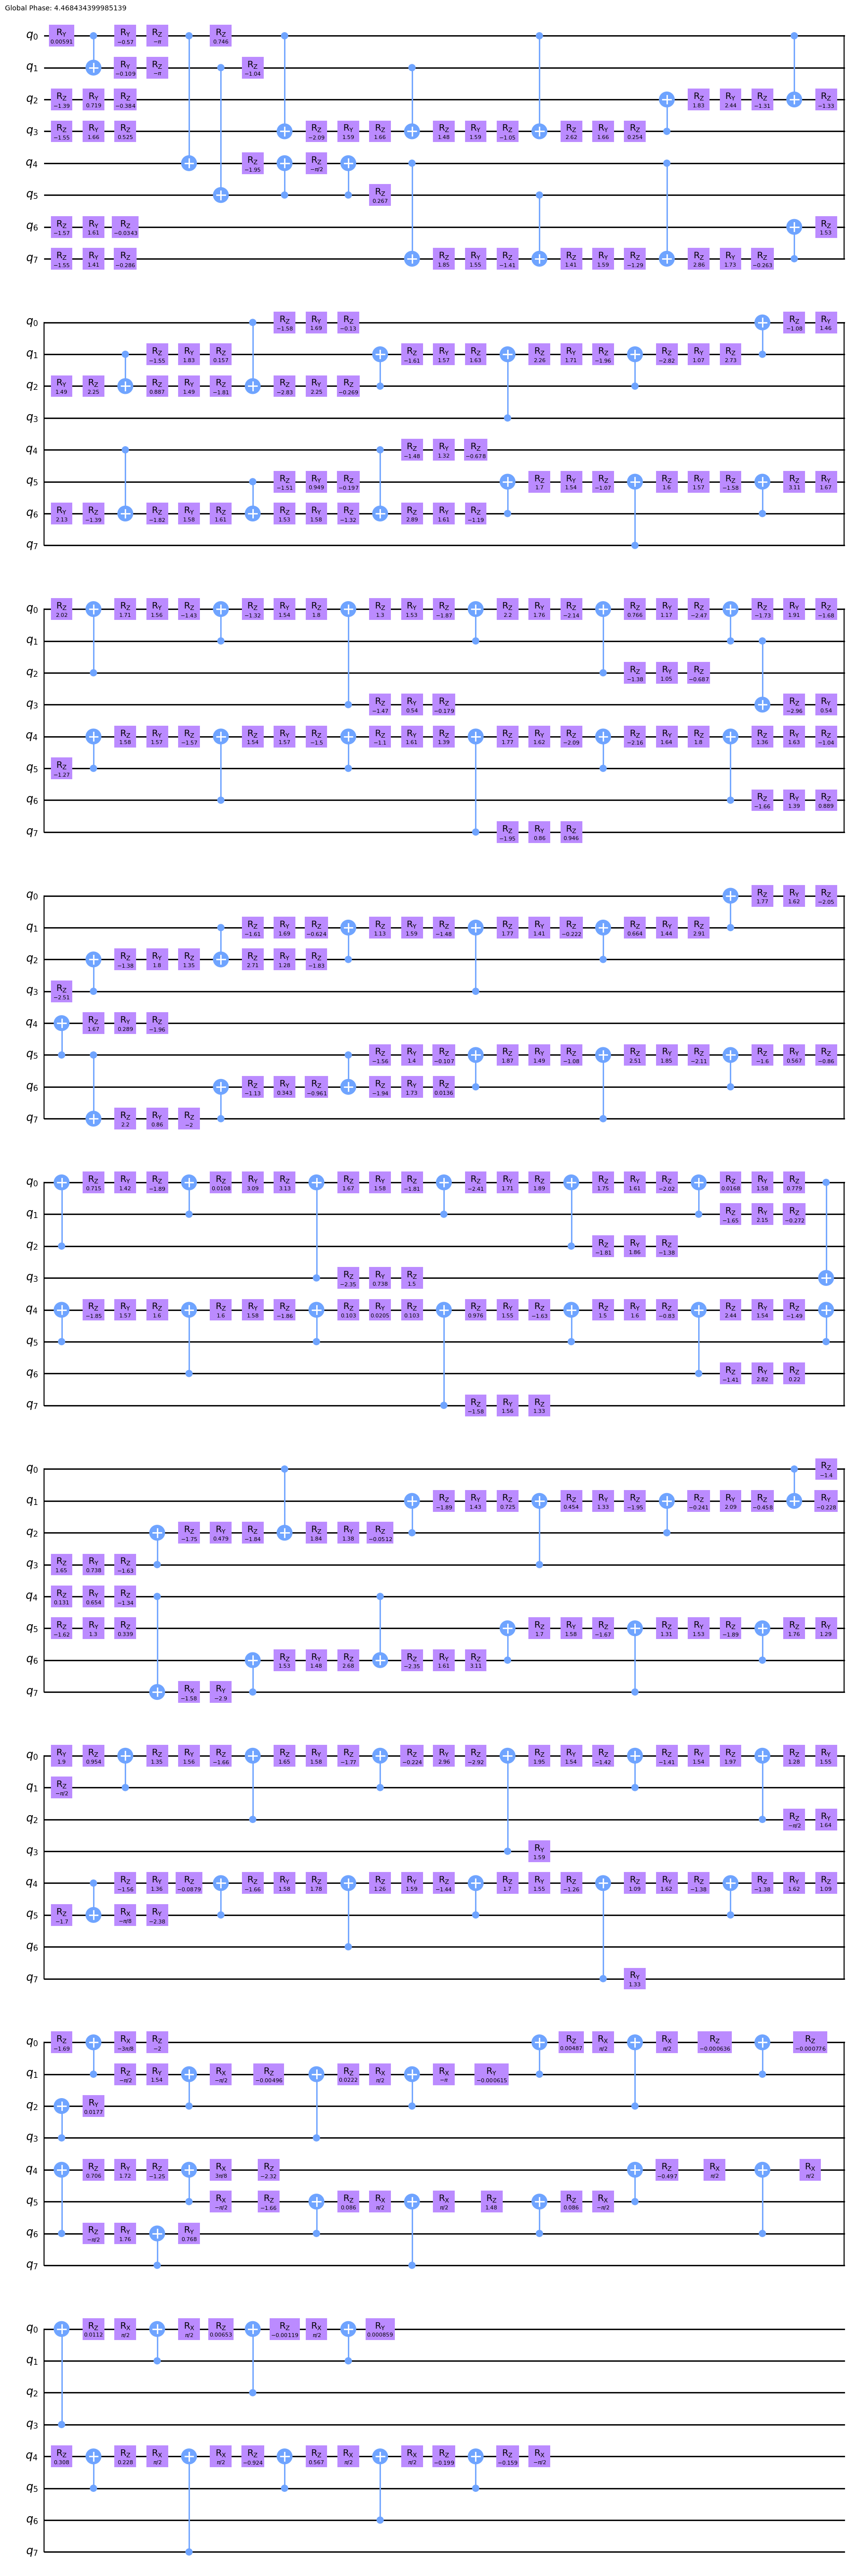

In [ ]:
qc.draw('mpl')